In [11]:
#NN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [12]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [13]:
print("Shape of x_train =",x_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of x_test =",x_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of x_train = (60000, 28, 28)
Shape of y_train = (60000,)
Shape of x_test = (10000, 28, 28)
Shape of y_test = (10000,)


5


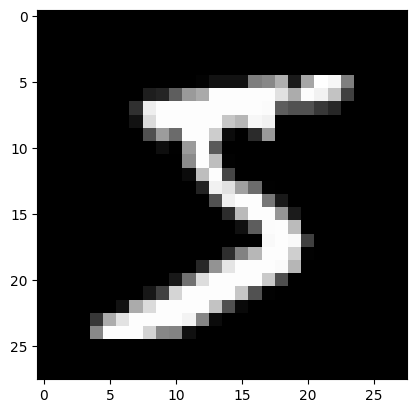

In [14]:
plt.imshow(x_train[0],cmap="gray") # cmap="gray" make it black and white, (cmap = color map)
print(y_train[0])

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

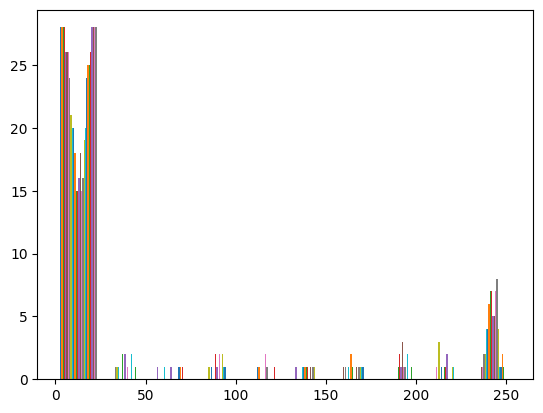

In [15]:
plt.hist(x_train[0]) # plot the histogram of pixels

In [16]:
x_train_reshape = x_train.reshape(60000,784) # convert it from 2D to 1D, (28*28 = 784)
x_test_reshape = x_test.reshape(10000,784)
# after reshape cannot be drawn again cause it converted to 1 colomn

#Normalization, cause acvtivation funct get y = (0,1) from x = (-5,5) and pixel are from 0 to 255
x_train_norm = x_train_reshape/255
x_test_norm = x_test_reshape/255

In [17]:
np.unique(y_train) # To know number of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
# one-hot incoding
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [19]:
model = Sequential()
model.add(Dense(4,activation="sigmoid",input_shape=(784,))) # Input layers, 4 parameters
model.add(Dense(5,activation="sigmoid")) # Hidden layers, 5 parameters
model.add(Dense(10,activation="softmax")) # Output layers, 10 parameters cause of 10 classes
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]) # Back probagation
#model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) # Back probagation
model.summary() # Show trianable parameters, (784*4 + 4 = 3140), (4*5 + 5 = 25), (5*10 + 10 = 60)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225 (12.60 KB)

 Trainable params: 3,225 (12.60 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#model.fit(x_train_norm,y_train,epochs=10,batch_size=30)
#history = model.fit(x_train_norm, y_train_cat, epochs=10, batch_size=30) # y with one-hot incodind
history = model.fit(x_train_norm, y_train_cat, epochs=10, batch_size=10, validation_split=0.2) # Validation, y with one-hot incoding
# must have same shape for input and output, use one-hot incoding to change train label from decimal into binary

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3533 - loss: 1.9869 - val_accuracy: 0.5842 - val_loss: 1.2869
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5915 - loss: 1.2133 - val_accuracy: 0.6388 - val_loss: 1.0393
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6529 - loss: 0.9999 - val_accuracy: 0.6860 - val_loss: 0.8785
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6938 - loss: 0.8549 - val_accuracy: 0.7017 - val_loss: 0.7989
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7142 - loss: 0.7874 - val_accuracy: 0.7393 - val_loss: 0.7613
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7379 - loss: 0.7521 - val_accuracy: 0.7511 - val_loss: 0.7408
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7579 - loss: 0.7252 - val_accuracy: 0.7772 - val_loss: 0.7239
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7838 - loss: 0

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

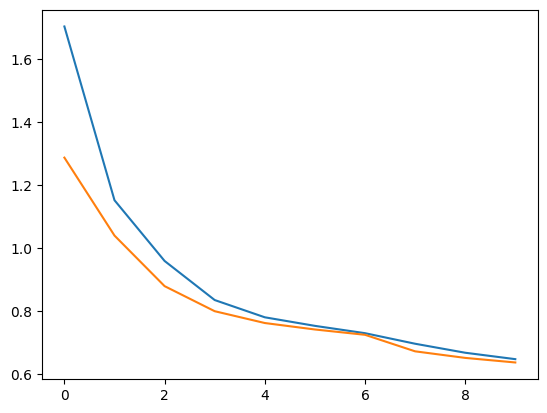

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

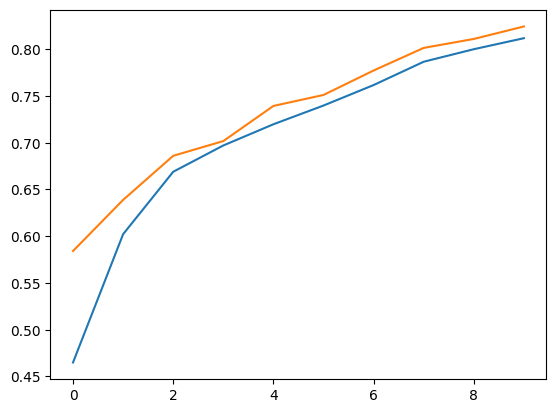

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [35]:
model.evaluate(x_test_norm,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8071 - loss: 0.6858


[0.636025071144104, 0.8245000243186951]

4


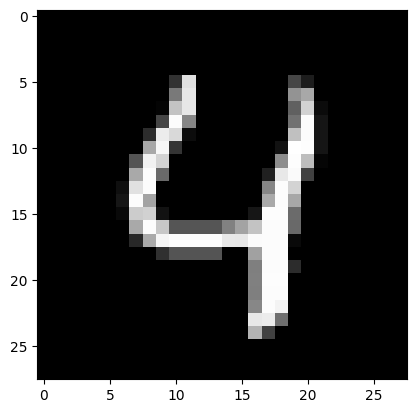

In [36]:
plt.imshow(x_test[4], cmap="gray")
print(y_test[4])

In [37]:
np.argmax(model.predict(x_test_norm[4:5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(4)

In [38]:
y_pred = model.predict(x_test_norm)
#y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels = np.argmax(y_pred,axis=1)
y_pred_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [39]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_labels)
cm

array([[ 934,    0,    0,    4,    1,    4,   24,    8,    5,    0],
       [   3, 1094,    6,    9,    0,    2,    1,    0,   20,    0],
       [  48,   22,  804,   52,    8,    1,   12,   45,   31,    9],
       [  59,   43,  129,  701,    0,   30,    6,   15,   22,    5],
       [   2,    1,    1,    1,  817,    1,   15,    8,    5,  131],
       [ 237,    1,    9,   28,   13,  455,   13,    7,  125,    4],
       [  43,    1,    1,    2,   16,   27,  840,   14,    8,    6],
       [   2,   10,   50,   11,   11,    0,    2,  874,    3,   65],
       [  21,   27,    7,    5,   20,   40,    3,    4,  832,   15],
       [  20,    3,    3,    0,   32,    5,    3,   29,   20,  894]])

<Axes: >

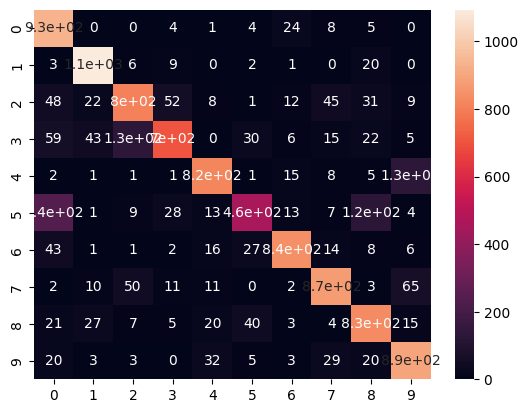

In [41]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [42]:
model.save("mymodel.h5")